Name:Amisha
USN:1CD24CS026
Project Name:Credit Risk Analysis
Section:A
SIC PROJECT

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
import pandas as pd
df = pd.read_csv("credit_risk.csv")
df.head()

annual_income_usd  outstanding_debt_usd  missed_payments employment_status  \
0       81575.064135          75798.529073             11.0        Unemployed   
1      224576.939272          54977.750739              3.0           Retired   
2      168983.904296          29672.932952             12.0               NaN   
3       49213.952130          86180.415372              8.0        Unemployed   
4       48161.674164          91736.175469             12.0     Self-Employed   

   employment_years  credit_history_years  number_of_credit_cards loan_types  \
0         15.045507             14.823965                     0.0        NaN   
1          4.659337                   NaN                     7.0        NaN   
2         35.675024             28.809400                     5.0        NaN   
3               NaN              6.945939                     9.0  Auto Only   
4          8.290977             13.201422                     1.0        NaN   

  marital_status  dependents education_level residence_type  savings_balance  \
0        Married         5.0     High School          Other    122291.420060   
1         Single         2.0          Master           Rent    169646.496934   
2        Married         2.0        Bachelor            Own              NaN   
3         Single         2.0             NaN           Rent    185629.039573   
4         Single         4.0          Master           Rent      6437.937004   

    age  credit_score  
0  25.0         318.0  
1  72.0         388.0  
2  47.0         452.0  
3  24.0         798.0  
4  67.0         381.0

check for the missing values


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_usd       947 non-null    float64
 1   outstanding_debt_usd    963 non-null    float64
 2   missed_payments         950 non-null    float64
 3   employment_status       955 non-null    object 
 4   employment_years        951 non-null    float64
 5   credit_history_years    940 non-null    float64
 6   number_of_credit_cards  954 non-null    float64
 7   loan_types              719 non-null    object 
 8   marital_status          956 non-null    object 
 9   dependents              953 non-null    float64
 10  education_level         951 non-null    object 
 11  residence_type          951 non-null    object 
 12  savings_balance         966 non-null    float64
 13  age                     948 non-null    float64
 14  credit_score            953 non-null    f

fill all the null values

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())  # Confirm no missing values

annual_income_usd         0
outstanding_debt_usd      0
missed_payments           0
employment_status         0
employment_years          0
credit_history_years      0
number_of_credit_cards    0
loan_types                0
marital_status            0
dependents                0
education_level           0
residence_type            0
savings_balance           0
age                       0
credit_score              0
dtype: int64


/tmp/ipython-input-2972767913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2972767913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

encode target coulmn

In [9]:
import numpy as np

# Assuming 'credit_score' is the basis for 'CreditRisk'
# Define a threshold to categorize credit scores into 'High' and 'Low' risk.
# For example, credit scores below 580 are considered 'High Risk'.
threshold = 580
df['CreditRisk'] = np.where(df['credit_score'] < threshold, 'High', 'Low')

# Now map the 'Low' and 'High' string values to 0 and 1 respectively.
df['CreditRisk'] = df['CreditRisk'].map({'Low':0, 'High':1})

identify numerical features

In [10]:

num_cols = df.select_dtypes(include=['int64','float64']).columns


Detect outliers. Outliers can increase risk; we may remove extreme outliers later.
Boxplot for every features:

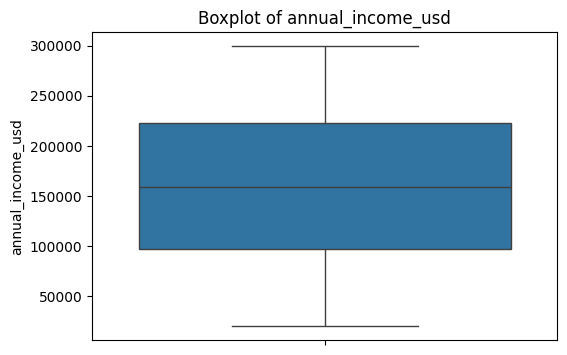

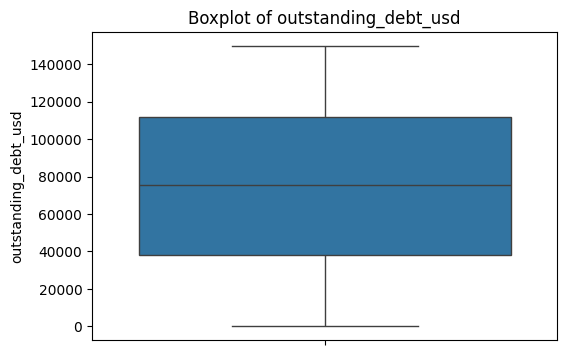

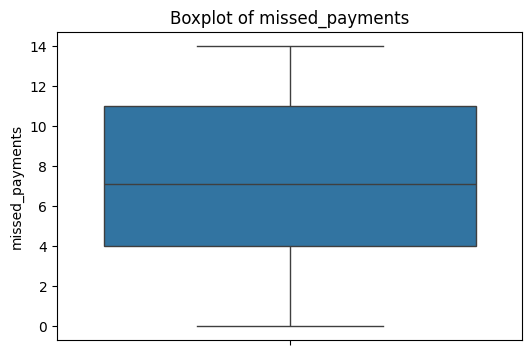

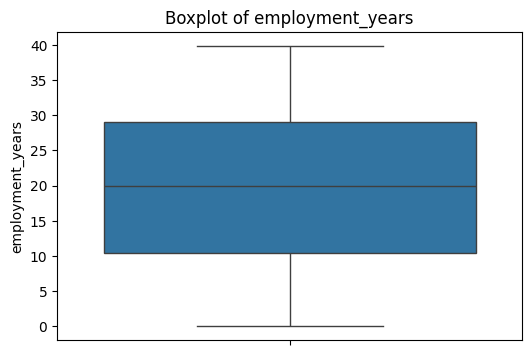

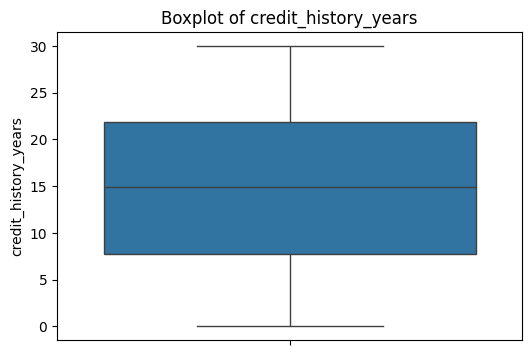

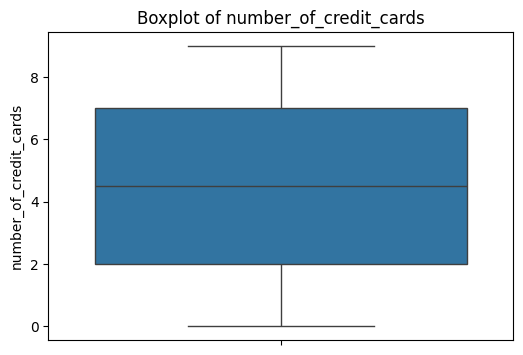

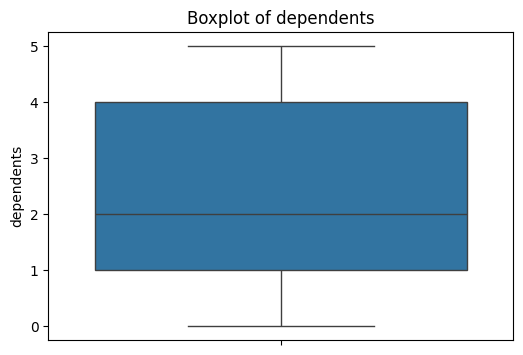

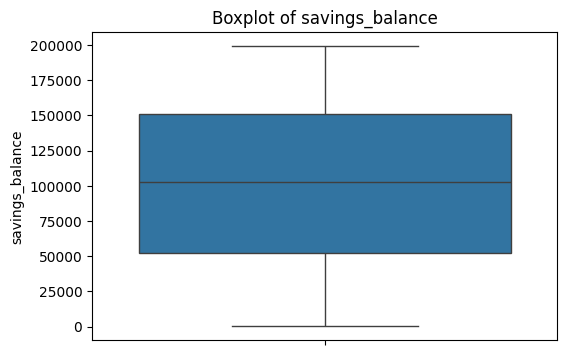

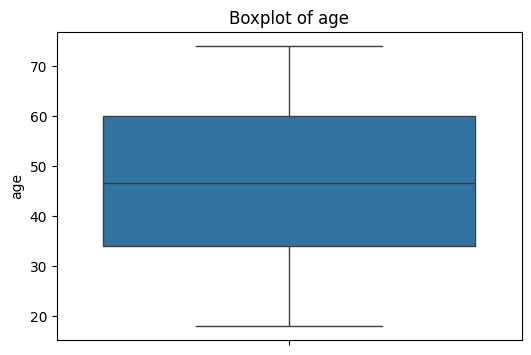

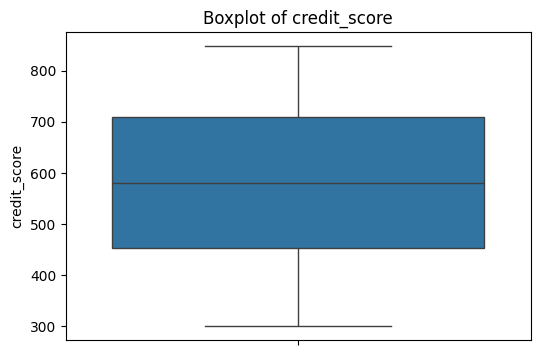

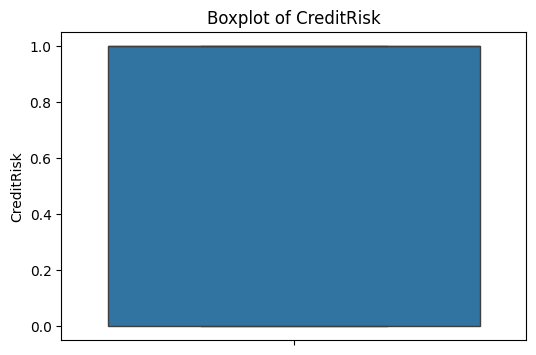

In [11]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


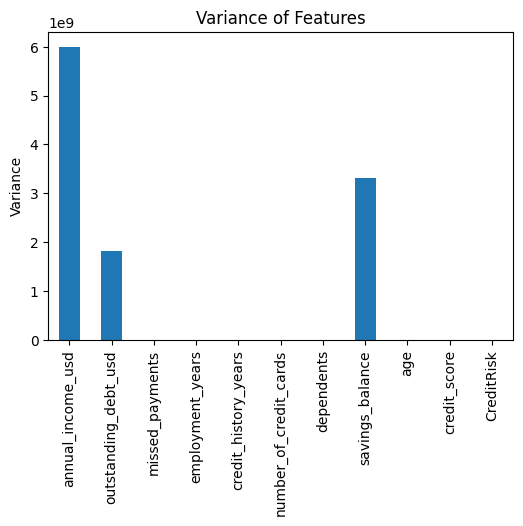

In [13]:
variance = df[num_cols].var()
plt.figure(figsize=(6,4))
variance.plot(kind='bar')
plt.title("Variance of Features")
plt.ylabel("Variance")
plt.show()


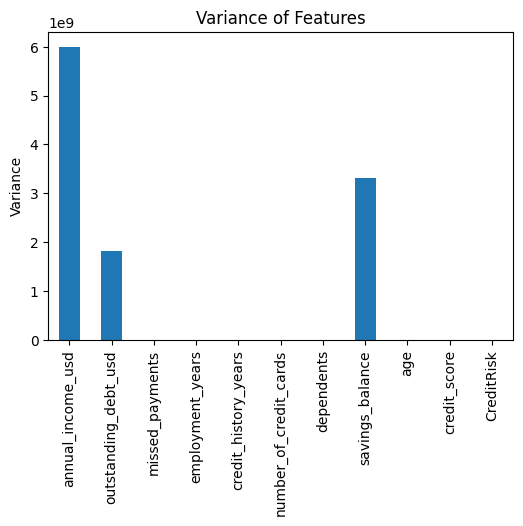

In [14]:
variance = df[num_cols].var()
plt.figure(figsize=(6,4))
variance.plot(kind='bar')
plt.title("Variance of Features")
plt.ylabel("Variance")
plt.show()


High variance → feature spreads widely → may influence credit risk strongly.

Low variance → feature has almost same value → less impact.

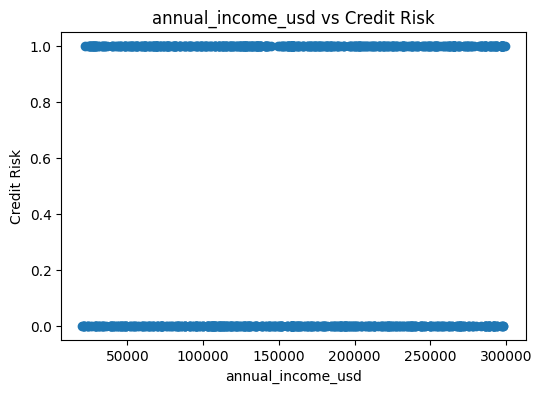

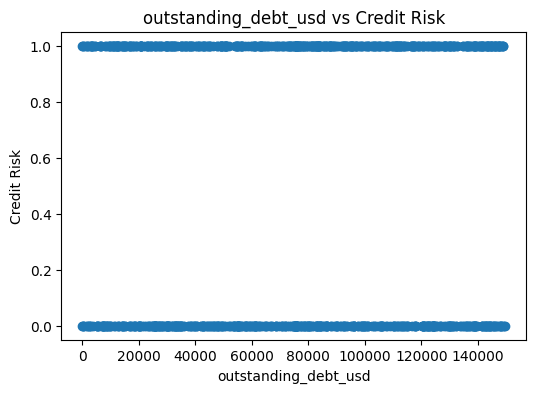

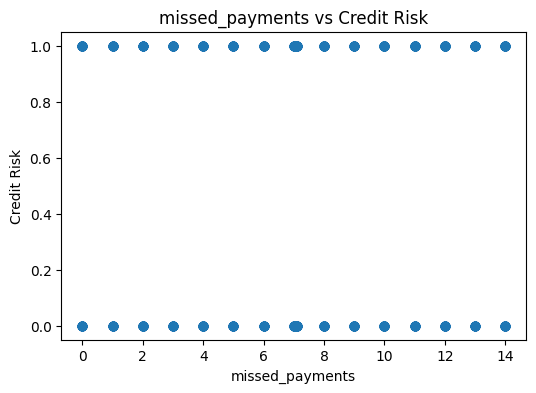

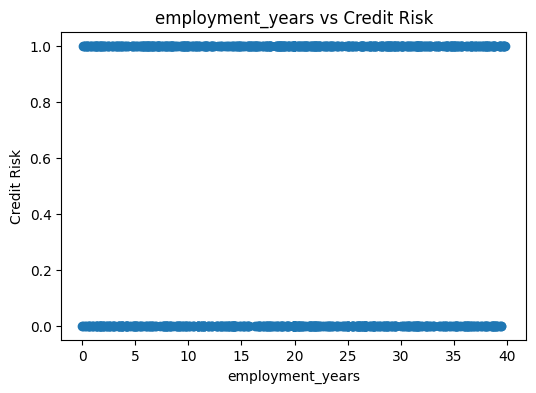

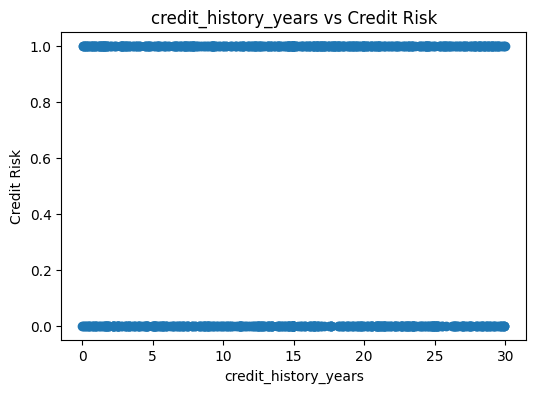

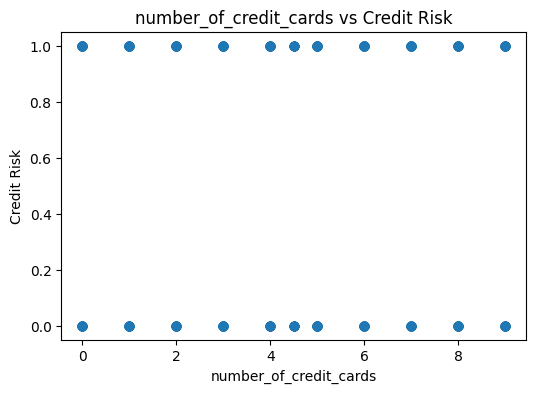

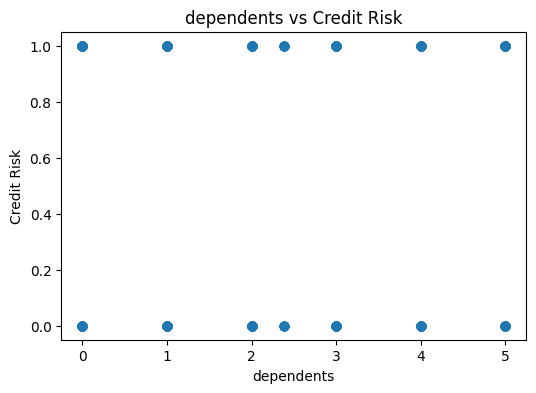

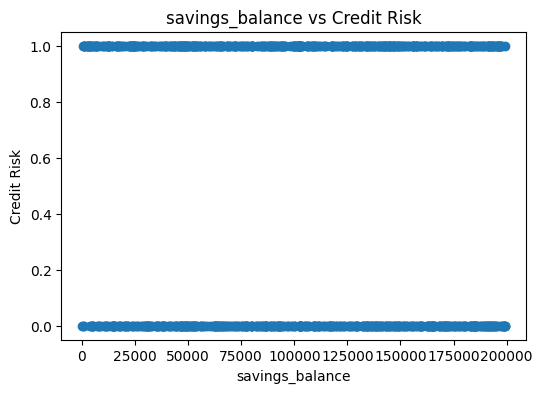

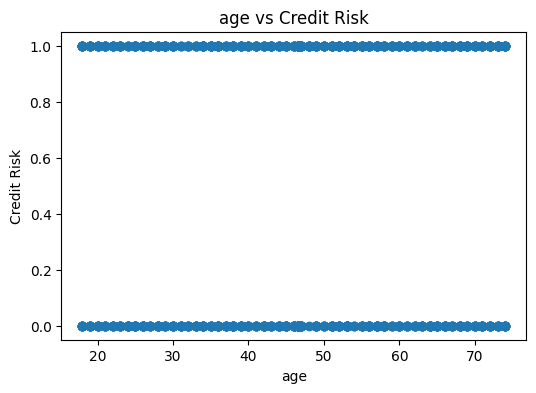

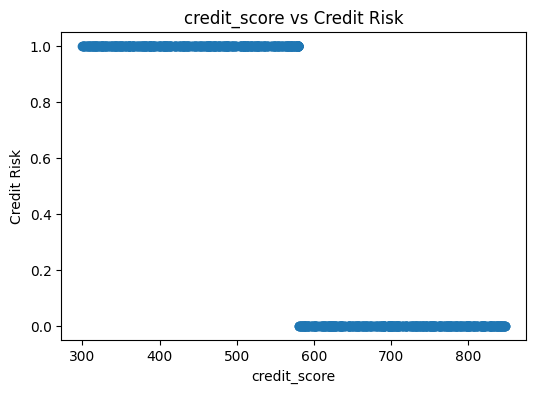

In [15]:
for col in num_cols:
    if col != 'CreditRisk':
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df['CreditRisk'])
        plt.xlabel(col)
        plt.ylabel("Credit Risk")
        plt.title(f"{col} vs Credit Risk")
        plt.show()


Positive correlation → higher value increases credit risk probability

Negative correlation → higher value reduces credit risk

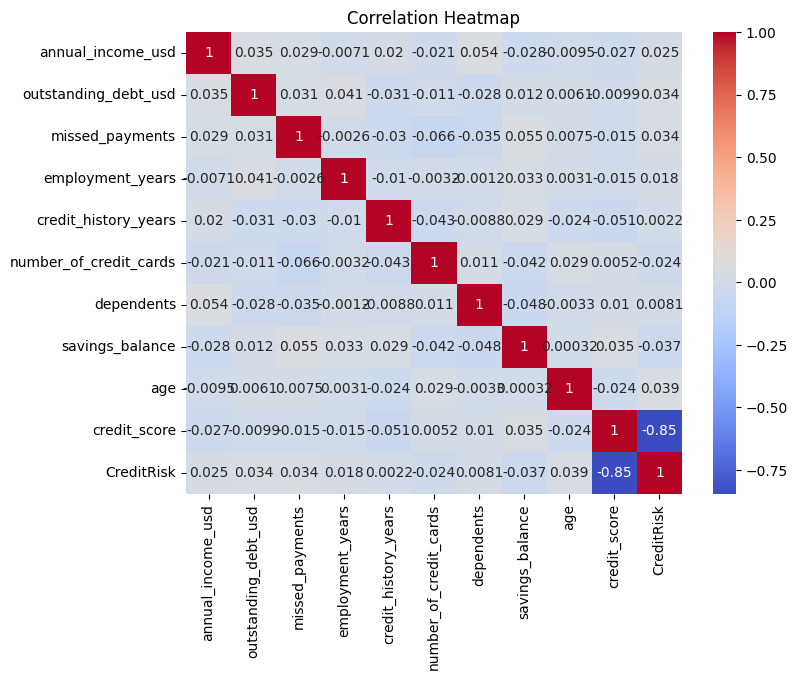

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Positive correlation → directly affects risk

Negative correlation → inversely affects risk

Strong correlation > 0.5 or < -0.5 is important

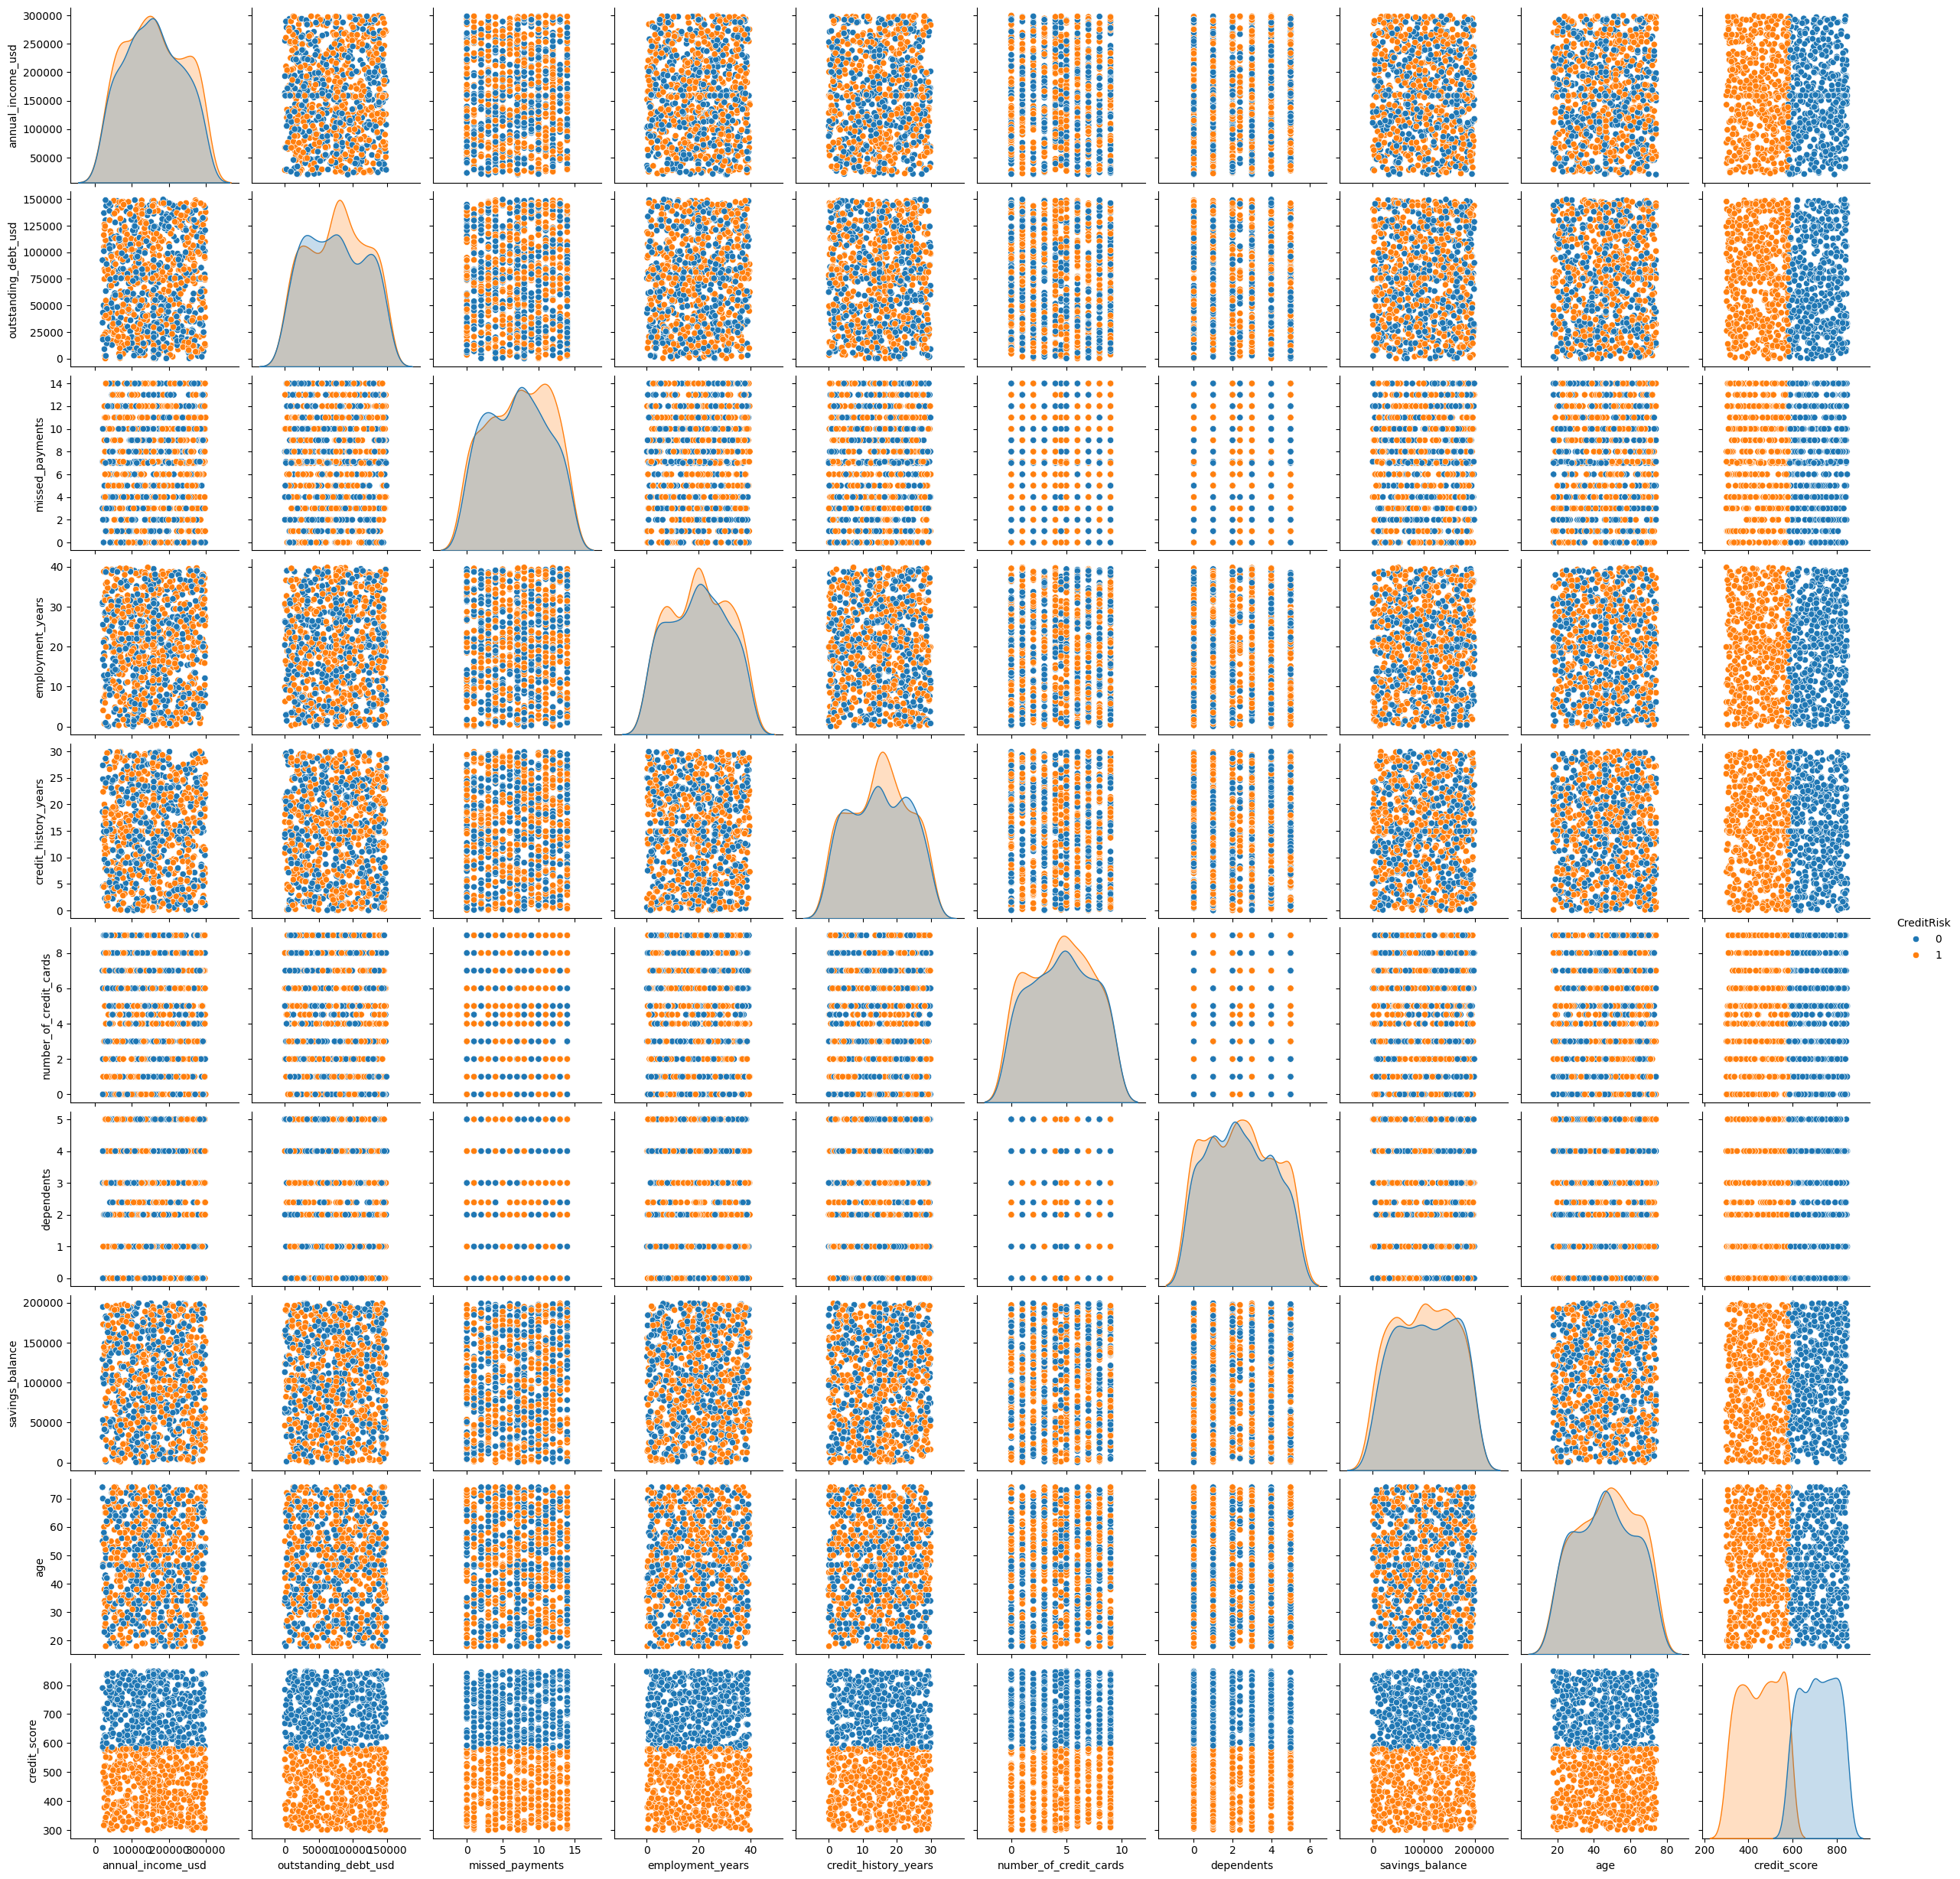

In [17]:
sns.pairplot(df, hue='CreditRisk')
plt.show()


Compare all features together

Shows clusters for Low vs High risk visually

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Separate features and target
X = df.drop('CreditRisk', axis=1)
y = df['CreditRisk']

# Step 2: Encode categorical features (if any left)
X = pd.get_dummies(X, drop_first=True)  # converts all strings to numeric

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest training successful!")

Random Forest training successful!


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Separate target and features
X = df.drop('CreditRisk', axis=1)
y = df['CreditRisk'].astype(int)  # Ensure target is numeric

# 2. Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest trained successfully!")


Random Forest trained successfully!


In [25]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy*100:.2f}%")


Random Forest Accuracy: 100.00%


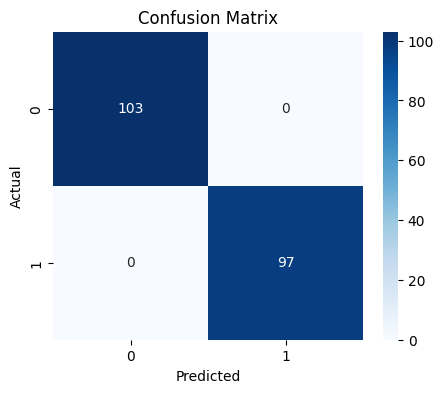

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


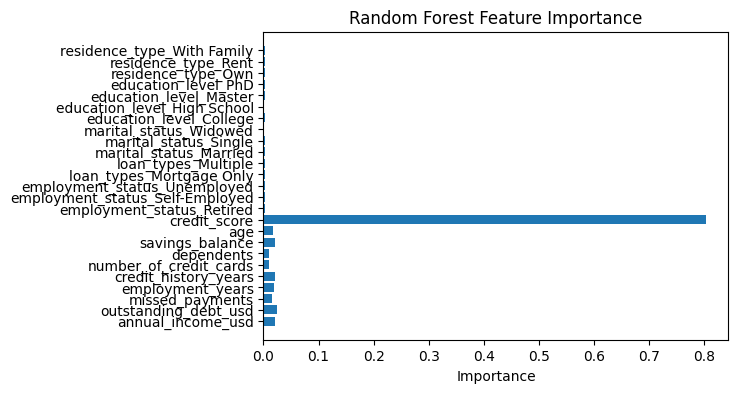

In [27]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

plt.figure(figsize=(6,4))
plt.barh(X_train.columns, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [28]:
# Encode full dataset
X_all = pd.get_dummies(df.drop('CreditRisk', axis=1), drop_first=True)

# Align columns with training set to prevent errors
X_all = X_all.reindex(columns=X_train.columns, fill_value=0)

# Predict risk for all rows
df['PredictedRisk'] = rf.predict(X_all)
df['RiskStatus'] = df['PredictedRisk'].apply(
    lambda x: 'High Risk (Negative)' if x==1 else 'Low Risk (Positive)'
)

print(df[['PredictedRisk','RiskStatus']].head())


   PredictedRisk            RiskStatus
0              1  High Risk (Negative)
1              1  High Risk (Negative)
2              1  High Risk (Negative)
3              0   Low Risk (Positive)
4              1  High Risk (Negative)


In [32]:
# Hypothetical improvements
df['AdjustedIncome'] = df['annual_income_usd'] * 1.2
df['AdjustedOutstandingLoans'] = df['outstanding_debt_usd'] * 0.8

# Prepare adjusted features
X_adjusted = df.drop(['CreditRisk','PredictedRisk','RiskStatus'], axis=1)
X_adjusted = pd.get_dummies(X_adjusted, drop_first=True)

# Align columns with training set
X_adjusted = X_adjusted.reindex(columns=X_train.columns, fill_value=0)

# Predict adjusted risk
df['AdjustedRiskStatus'] = rf.predict(X_adjusted)
df['AdjustedRiskStatus'] = df['AdjustedRiskStatus'].apply(
    lambda x: 'High Risk (Negative)' if x==1 else 'Low Risk (Positive)'
)

print(df[['RiskStatus','AdjustedRiskStatus']].head())

             RiskStatus    AdjustedRiskStatus
0  High Risk (Negative)  High Risk (Negative)
1  High Risk (Negative)  High Risk (Negative)
2  High Risk (Negative)  High Risk (Negative)
3   Low Risk (Positive)   Low Risk (Positive)
4  High Risk (Negative)  High Risk (Negative)


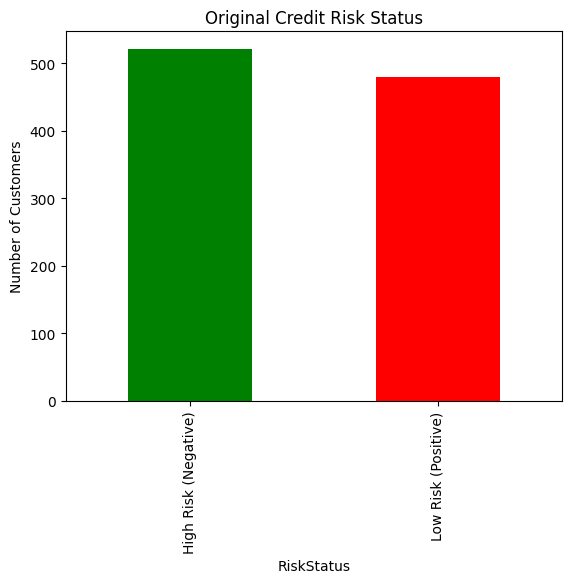

In [33]:
import matplotlib.pyplot as plt

df['RiskStatus'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Original Credit Risk Status")
plt.ylabel("Number of Customers")
plt.show()


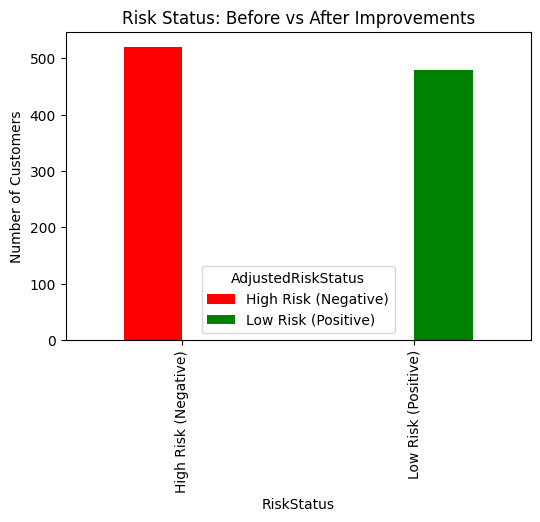

In [34]:
comparison = df[['RiskStatus','AdjustedRiskStatus']].value_counts().unstack().fillna(0)
comparison.plot(kind='bar', figsize=(6,4), color=['red','green'])
plt.title("Risk Status: Before vs After Improvements")
plt.ylabel("Number of Customers")
plt.show()




Low Risk (Positive): Can give loan safely.

High Risk (Negative): Risk of default; bank should ask for collateral, reduce loan amount, or improve repayment history.

Adjusted Status:

Shows the impact of improving financial factors (income ↑, debt ↓)

Helps banks decide interventions to reduce credit risk

